In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

BIC = [f for f in os.listdir() if 'BIC' in f]
BIC = [f for f in BIC if '.npy' in f and 'Rside' in f]
BIC

unrw_BIC = np.load(BIC[0], allow_pickle=True)
rw_BIC = np.load(BIC[1], allow_pickle=True)

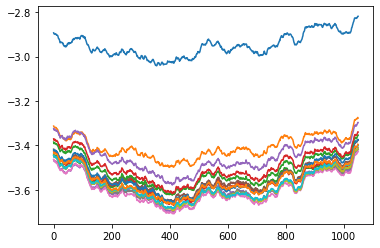

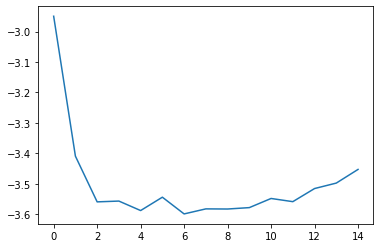

In [2]:
for arr in unrw_BIC:
    plt.plot(arr)
arr_means = [np.mean(arr) for arr in unrw_BIC]
plt.show()
plt.plot(arr_means)

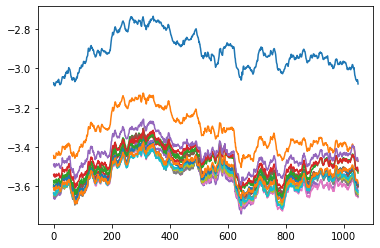

model order with min BIC: 6


NameError: name 'pfc2hpc' is not defined

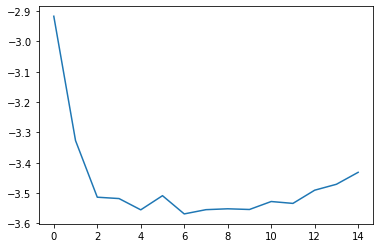

In [3]:
for arr in rw_BIC:
    plt.plot(arr)
plt.show()
arr_means = [np.mean(arr) for arr in rw_BIC]
print(f'model order with min BIC: {list(arr_means).index(np.min(arr_means))}')
plt.plot(arr_means)

pfc2hpc

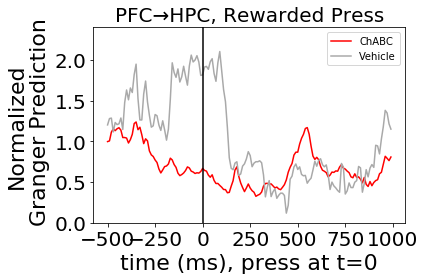

In [11]:
from scipy.signal import butter, filtfilt, hilbert, decimate

pfc2hpc = [f for f in os.listdir() if 'R1toR2' in f]
pfc2hpc

abc_unrw_gc = decimate(np.load(pfc2hpc[0], allow_pickle=True), q=5)
abc_rw_gc = decimate(np.load(pfc2hpc[1], allow_pickle=True), q=5)
veh_unrw_gc = decimate(np.load(pfc2hpc[2], allow_pickle=True), q=5)
veh_rw_gc = decimate(np.load(pfc2hpc[3], allow_pickle=True), q=5)

abc_unrw_gc = np.array(abc_unrw_gc) / np.mean(abc_unrw_gc[:50])
abc_rw_gc = np.array(abc_rw_gc) / np.mean(abc_rw_gc[:50])
veh_unrw_gc = np.array(veh_unrw_gc) / np.mean(veh_unrw_gc[:50])
veh_rw_gc = np.array(veh_rw_gc) / np.mean(veh_rw_gc[:50])

fs = 100
t = np.arange(-0.85,1.25, 1/fs)*1000
t = np.round(t,2)

plt.plot(t[35:185], abc_rw_gc[35:185], c='r', label='ChABC')
plt.plot(t[35:185], veh_rw_gc[35:185], c='darkgray', label='Vehicle')
plt.title('PFC→HPC, Rewarded Press', fontsize=20)
plt.axvline(x=0, c='k')
plt.xlabel('time (ms), press at t=0', fontsize=22)
plt.xticks(range(-500,1001, 250), fontsize=20)
plt.ylim(0,2.4)
plt.ylabel('Normalized\n Granger Prediction', fontsize=22)
plt.yticks(fontsize=20)
plt.legend()
plt.tight_layout()
plt.savefig('VR5_timedomain_GrangerCausality_RewardedPress.png', dpi=600)

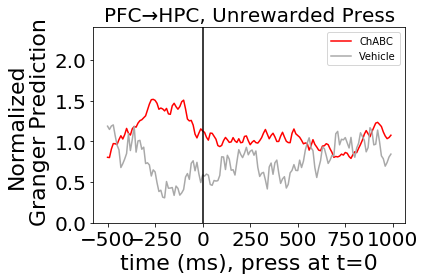

In [12]:
plt.plot(t[35:185], abc_unrw_gc[35:185], c='r', label='ChABC')
plt.plot(t[35:185], veh_unrw_gc[35:185], c='darkgray', label='Vehicle')
plt.title('PFC→HPC, Unrewarded Press', fontsize=20)
plt.axvline(x=0, c='k')
plt.xlabel('time (ms), press at t=0', fontsize=22)
plt.xticks(range(-500,1001, 250), fontsize=20)
plt.ylim(0,2.4)
plt.ylabel('Normalized\n Granger Prediction', fontsize=22)
plt.yticks(fontsize=20)
plt.legend()
plt.tight_layout()
plt.savefig('VR5_timedomain_GrangerCausality_UnrewardedPress.png',dpi=600)

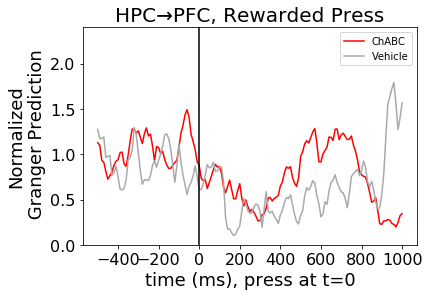

In [39]:
from scipy.signal import butter, filtfilt, hilbert, decimate

pfc2hpc = [f for f in os.listdir() if 'R2toR1' in f]
pfc2hpc

abc_unrw_gc = decimate(np.load(pfc2hpc[0], allow_pickle=True), q=5)
abc_rw_gc = decimate(np.load(pfc2hpc[1], allow_pickle=True), q=5)
veh_unrw_gc = decimate(np.load(pfc2hpc[2], allow_pickle=True), q=5)
veh_rw_gc = decimate(np.load(pfc2hpc[3], allow_pickle=True), q=5)

abc_unrw_gc = np.array(abc_unrw_gc) / np.mean(abc_unrw_gc[:50])
abc_rw_gc = np.array(abc_rw_gc) / np.mean(abc_rw_gc[:50])
veh_unrw_gc = np.array(veh_unrw_gc) / np.mean(veh_unrw_gc[:50])
veh_rw_gc = np.array(veh_rw_gc) / np.mean(veh_rw_gc[:50])

fs = 100
t = np.arange(-0.85,1.25, 1/fs)*1000
t = np.round(t,2)

plt.plot(t[35:186], abc_rw_gc[35:186], c='r', label='ChABC')
plt.plot(t[35:186], veh_rw_gc[35:186], c='darkgray', label='Vehicle')
plt.title('HPC→PFC, Rewarded Press', fontsize=20)
plt.axvline(x=0, c='k')
plt.xlabel('time (ms), press at t=0', fontsize=18)
plt.xticks(fontsize=16)
plt.ylim(0,2.4)
plt.ylabel('Normalized\n Granger Prediction', fontsize=18)
plt.yticks(fontsize=16)
plt.legend()
#plt.savefig('VR5_timedomain_GrangerCausality_RewardedPress',dpi=600)

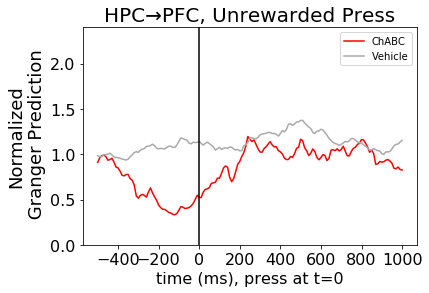

In [40]:
plt.plot(t[35:186], abc_unrw_gc[35:186], c='r', label='ChABC')
plt.plot(t[35:186], veh_unrw_gc[35:186], c='darkgray', label='Vehicle')
plt.title('HPC→PFC, Unrewarded Press', fontsize=20)
plt.axvline(x=0, c='k')
plt.xlabel('time (ms), press at t=0', fontsize=16)
plt.xticks(fontsize=16)
plt.ylim(0,2.4)
plt.ylabel('Normalized\n Granger Prediction', fontsize=18)
plt.yticks(fontsize=16)
plt.legend()
#plt.savefig('VR5_timedomain_GrangerCausality_UnrewardedPress.png',dpi=600)